# Tutorial Step 5: GWpy Examples

This tutorial will present [GWpy](https://gwpy.github.io/), a python package that provides a user-friendly, intuitive interface to the common time-domain and frequency-domain data.
It also allows programmatic access to the data on the [GWOSC web site](https://gwosc.org/).
Here, we will only focus on reading data from the GWOSC.
More information can be found in the [package documentation](https://gwpy.github.io/docs/).

This step assumes familiarity with some concepts introduced in the previous tutorials in particular about data quality flags introduced in [step 3](<03 - Working with Data Quality.ipynb>).
If you struggle to understand some points, don't hesitate to go back to previous tutorials.

<div class="alert alert-block alert-warning">
<div><b> &#9888 Warning</b></div>
    Uncomment the following cell if running in Google Colab.
    If you use other running methods, it should not be necessary.
</div>

In [1]:
#! pip install -q 'gwpy==3.0.10'

## Checking installation

Let's check that GWpy is correctly installed in your environment.

In [2]:
# If you import GWpy without those lines, you might see some warnings related to the LAL package.
# Those warnings are harmless so we use those lines to hide them.
import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")

# Now import gwpy
import gwpy
print(gwpy.__version__)

3.0.10


## Reading data

[GWpy](https://gwpy.github.io/) provides a high-level API to read GWOSC files.
This is done through the [TimeSeries](https://gwpy.github.io/docs/stable/timeseries/) class and the [read](https://gwpy.github.io/docs/stable/api/gwpy.timeseries.TimeSeries/#gwpy.timeseries.TimeSeries.read) class-method.

Let's read our data:

In [3]:
from gwpy.timeseries import TimeSeries

filename = 'H-H1_GWOSC_O3b_4KHZ_R1-1264312320-4096.hdf5'

# Note the format argument (see doc)
data = TimeSeries.read(filename, format="hdf5.gwosc")
print(data)

TimeSeries([-9.97334403e-21, -1.48231254e-20, -2.54824746e-22,
            ..., -1.28230647e-20, -2.99821216e-21,
            -7.84130577e-21]
           unit: dimensionless,
           t0: 1264312320.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


As you can see, a [TimeSeries](https://gwpy.github.io/docs/stable/timeseries/) object combines the value of the (dimensionless) strain and the acquisition time.

The [TimeSeries](https://gwpy.github.io/docs/stable/timeseries/) object can be plotted directly:

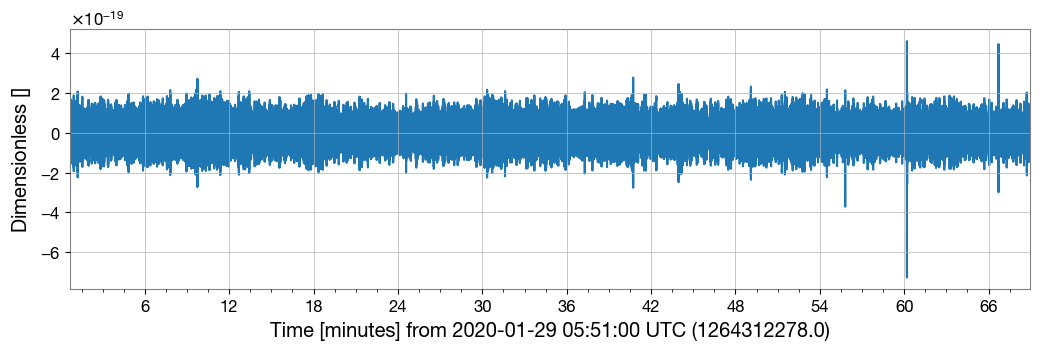

In [4]:
figure = data.plot()

## Downloading data

[GWpy](https://gwpy.github.io/) can be used to download a chunk of data around a GPS time thanks to the [fetch_open_data](https://gwpy.github.io/docs/stable/timeseries/opendata/#timeseries-fetch-open-data) class-method.

This method offers more flexibility compared to downloading files and then read the data in it since you can download exactly the data you want without having to juggle between several files.

For instance, let's download the data the first 15 seconds of data:

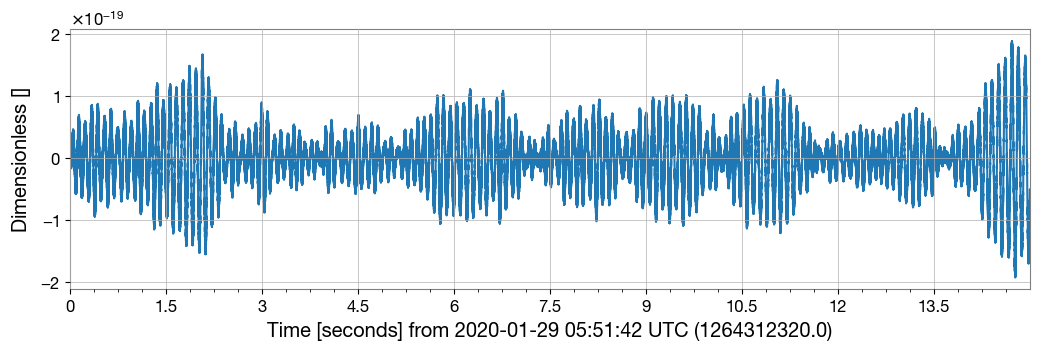

In [5]:
start = 1264312320

data_15s = TimeSeries.fetch_open_data('H1', start, start + 15)
figure_data_15s = data_15s.plot()

Also, you can download data around a particular event:

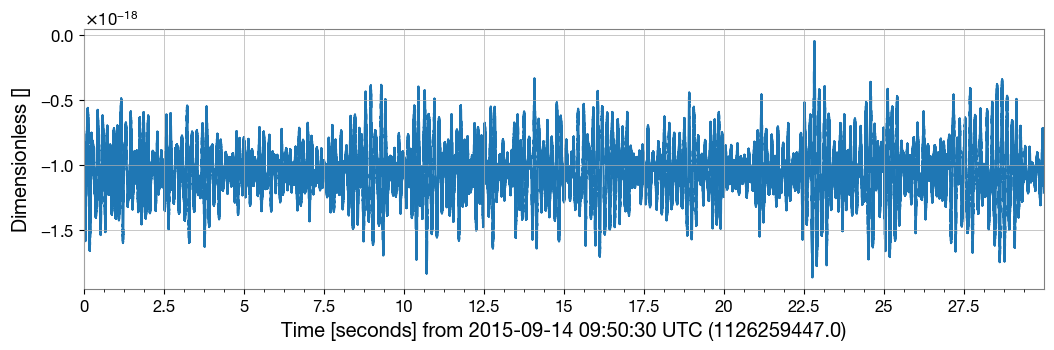

In [6]:
from gwosc.datasets import event_gps

event_gps   = event_gps("GW150914")
event_start = int(event_gps) - 15
event_end   = int(event_gps) + 15

event_data = TimeSeries.fetch_open_data('L1', event_start, event_end)
event_figure = event_data.plot()

The [gwosc](https://gwosc.readthedocs.io/en/stable/) package is a low-level interface to the GWOSC website that is used by [GWpy](https://gwpy.github.io/) for some operations.

### Manipulating [TimeSeries](https://gwpy.github.io/docs/stable/timeseries/)

[TimeSeries](https://gwpy.github.io/docs/stable/timeseries/) can be sliced using time, not just indices.

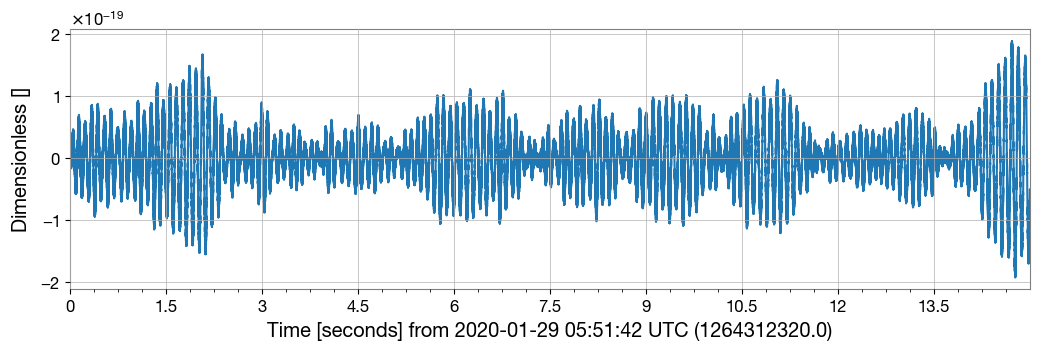

In [7]:
cropped_data = data.crop(start, start + 15)
cropped_figure = cropped_data.plot()

As you can see, the time axis is correctly sliced too.

[TimeSeries](https://gwpy.github.io/docs/stable/timeseries/) objects also has advanced statistical and signal-processing methods.
Read more [here](https://gwpy.github.io/docs/stable/examples/timeseries/).

## Data quality and segments

Access to data quality is done through the [StateVector](https://gwpy.github.io/docs/stable/api/gwpy.timeseries.StateVector/#gwpy.timeseries.StateVector) class.

Let's start by reading the data quality information from our file with the [read](https://gwpy.github.io/docs/stable/api/gwpy.timeseries.StateVector/#gwpy.timeseries.StateVector.read) class method:

In [8]:
from gwpy.timeseries import StateVector

state = StateVector.read(filename, format="hdf5.gwosc")
print(state)

StateVector([127, 127, 127, ..., 127, 127, 127]
            unit: dimensionless,
            t0: 1264312320.0 s,
            dt: 1.0 s,
            name: Data quality,
            channel: None,
            bits: Bits(0: data present
                        1: passes the cbc CAT1 test
                        2: passes cbc CAT2 test
                        3: passes cbc CAT3 test
                        4: passes burst CAT1 test
                        5: passes burst CAT2 test
                        6: passes burst CAT3 test,
                        channel=None,
                        epoch=1264312320.0))


You will recognize the bit mask representation that we have seen in [step 3](<03 - Working with Data Quality.ipynb>).
Note that the names of the channels are taken from their description.

Let's plot that.

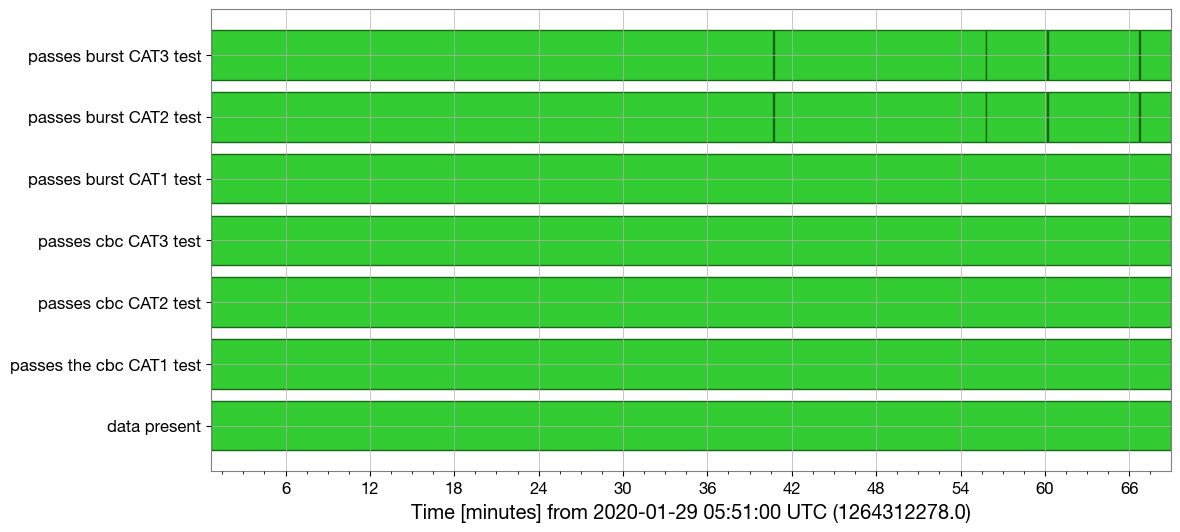

In [9]:
figure_state = state.plot()

Let's try to convert this to a list of segments as we did in [step 3](<03 - Working with Data Quality.ipynb>).
To do so we first use the method [to_dqflags](https://gwpy.github.io/docs/stable/api/gwpy.timeseries.StateVector/#gwpy.timeseries.StateVector.to_dqflags) to turn the [StateVector](https://gwpy.github.io/docs/stable/api/gwpy.timeseries.StateVector/#gwpy.timeseries.StateVector) object to a [DataQualityFlag](https://gwpy.github.io/docs/stable/api/gwpy.segments.DataQualityFlag/#gwpy.segments.DataQualityFlag), an object that represents the segments in each category.

In [10]:
flags = state.to_dqflags()
print(flags)

DataQualityDict({'data present': <DataQualityFlag('data present',
                 known=[[1264312320.0 ... 1264316416.0)]
                 active=[[1264312320.0 ... 1264316416.0)]
                 description=None)>, 'passes the cbc CAT1 test': <DataQualityFlag('passes the cbc CAT1 test',
                 known=[[1264312320.0 ... 1264316416.0)]
                 active=[[1264312320.0 ... 1264316416.0)]
                 description=None)>, 'passes cbc CAT2 test': <DataQualityFlag('passes cbc CAT2 test',
                 known=[[1264312320.0 ... 1264316416.0)]
                 active=[[1264312320.0 ... 1264316416.0)]
                 description=None)>, 'passes cbc CAT3 test': <DataQualityFlag('passes cbc CAT3 test',
                 known=[[1264312320.0 ... 1264316416.0)]
                 active=[[1264312320.0 ... 1264316416.0)]
                 description=None)>, 'passes burst CAT1 test': <DataQualityFlag('passes burst CAT1 test',
                 known=[[1264312320.0 ... 1264316416.0

The categories can be combined using logical operations.
So to find data where both the `DATA` and `BURST_CAT2` categories are passed, we can proceed as follows.

In [11]:
mask = flags['data present'] & flags['passes burst CAT2 test']
print(mask.active)

[[1264312320.0 ... 1264314720.0)
 [1264314723.0 ... 1264315625.0)
 [1264315628.0 ... 1264315888.0)
 [1264315891.0 ... 1264316279.0)
 [1264316282.0 ... 1264316416.0)]


This is the same segment list as in [step 3](<03 - Working with Data Quality.ipynb>).

We can now plot the first few seconds of each segment.

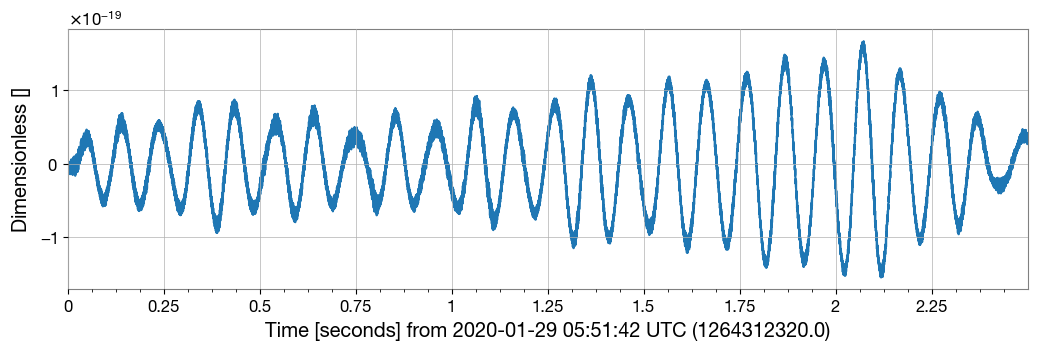

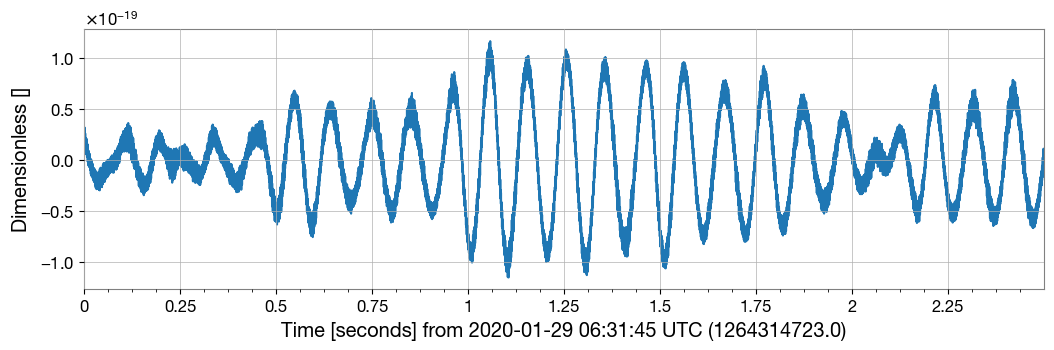

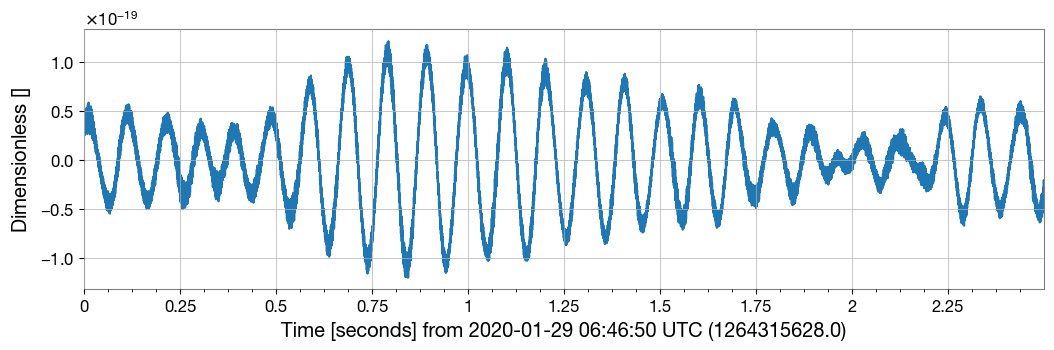

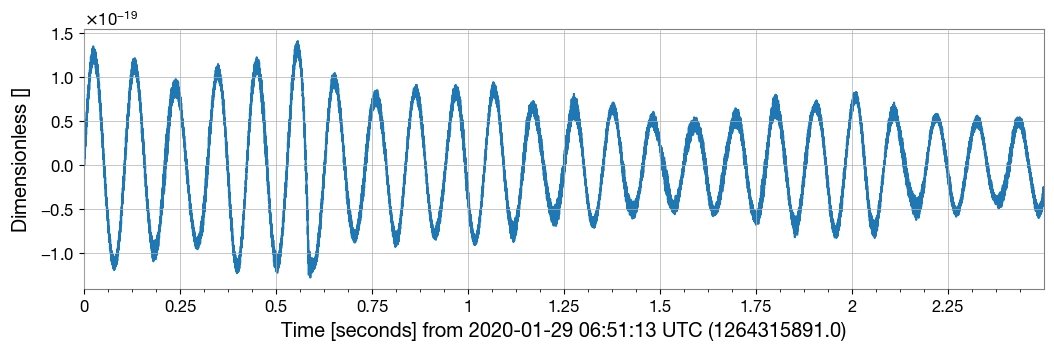

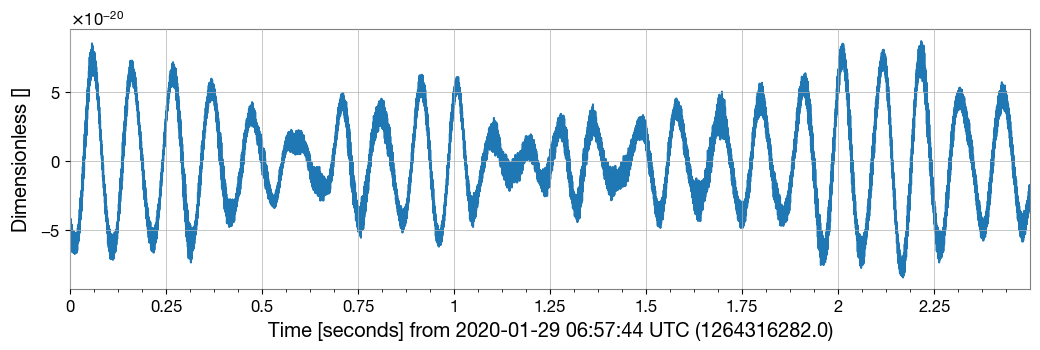

In [12]:
for (begin, end) in mask.active:
    sub = data.crop(begin, begin + 2.5)
    sub.plot()

As with [TimeSeries](https://gwpy.github.io/docs/stable/timeseries/), the [StateVector](https://gwpy.github.io/docs/stable/api/gwpy.timeseries.StateVector/#gwpy.timeseries.StateVector) class also has a [fetch_open_data](https://gwpy.github.io/docs/stable/api/gwpy.timeseries.StateVector/#gwpy.timeseries.StateVector.fetch_open_data) method to download precisely the data you need.

## How to go further?

[GWpy](https://gwpy.github.io/) has many more functions and a very complete doc.
Have a look at it [here](https://gwpy.github.io/docs/stable/).

In particular, have a look at the [FrequencySeries](https://gwpy.github.io/docs/stable/spectrum/) class that is very useful to work in the frequency domain.

## What's next ?

Congratulations, you have completed the first steps of working with GW data !

To continue your journey, we recommend you take a look at the [GWOSC Learning Path](https://gwosc.org/path/).
To explore some events, you might be interested in our [Gravitational Wave Quickview tutorial](https://github.com/gwosc-tutorial/quickview).
And finally, you can participate in our annual [GW Open Data Workshops](https://gwosc.org/workshops/).